 El conjunto de datos **"VentaViviendas"** proporciona informaci√≥n detallada sobre la venta de viviendas, como el **precio de venta**, y las **caracter√≠sticas estructurales y geogr√°ficas**. El objetivo del an√°lisis es entender los **factores** que influyen en el precio y qu√© hace que una propiedad sea considerada **de lujo**. Posteriormente, haremos modelos de regresion para poder predecir el precio de la vivienda 

- El conjunto de datos contiene **diversas variables**, con dos objetivos principales:
  - **Precio de venta** ("Price").
  - **Vivienda de lujo** ("Luxury"): valor 1 si el precio es superior a medio mill√≥n de d√≥lares, 0 en caso contrario.

- El an√°lisis exploratorio busca **visualizar la distribuci√≥n** de los datos, **identificar anomal√≠as**, y **detectar correlaciones**. Esto permitir√° obtener **insights** para futuras **investigaciones** o **estrategias de negocio** en el mercado inmobiliario.

**Aspectos a abordar**:

- **Distribuci√≥n del precio de venta** y c√≥mo var√≠a seg√∫n el n√∫mero de **habitaciones**, **ba√±os**, y **superficie**.
- **Relaci√≥n entre el precio** y variables como el **estado de la vivienda**, el **a√±o de construcci√≥n**, y el **a√±o de renovaci√≥n**.
- **Influencia de la ubicaci√≥n** (latitud y longitud) en el precio y la categor√≠a de lujo.
- **Otras caracter√≠sticas**: vistas al mar, condici√≥n de la vivienda, entre otras.

El an√°lisis exploratorio ayudar√° a comprender mejor las **caracter√≠sticas clave** que determinan el **precio de venta** y los **factores m√°s influyentes** para clasificar una propiedad como de lujo.

| Variable      | Descripci√≥n                                                          |
|---------------|----------------------------------------------------------------------|
| Year, month   | A√±o y mes de la venta                                                |
| Price         | Precio de venta de la vivienda (objetivo)                            |
| Luxury        | Variable dicot√≥mica que toma valor 1 si es una vivienda de lujo      |
|               | (precio superior a medio mill√≥n de $) y 0 en caso contrario          |
| Bedrooms      | N√∫mero de habitaciones                                               |
| Bathrooms     | N√∫mero de ba√±os (los medios se refieren a aseos)                     |
| Sqft_living   | Superficie del sal√≥n                                                 |
| Sqft_lot      | Superficie total (incluye el jard√≠n)                                 |
| Sqft_above    | Superficie excluyendo el s√≥tano                                      |
| Basement      | ¬øTiene s√≥tano? (1: s√≠, 0: no)                                        |
| Floors        | N√∫mero de plantas                                                    |
| Waterfront    | ¬øTiene vistas al mar? (1: s√≠, 0: no)                                 |
| View          | ¬øTiene buenas vistas? (1: s√≠, 0: no)                                 |
| Condition     | Estado de la vivienda (de A a D, siendo A el mejor estado)           |
| Yr_built      | A√±o de construcci√≥n de la vivienda                                   |
| Yr_renovated  | A√±o de renovaci√≥n de la vivienda (si es 0, no ha sido renovada)      |
| Lat, Long     | Coordenadas de latitud y longitud de la vivienda                     |


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd


# Cargar el archivo Excel en un DataFrame
file_path = 'VentaViviendas.xlsx'  # Reemplaza con la ruta completa si es necesario
venta_viviendas_df = pd.read_excel(file_path)

# Mostrar las primeras filas para verificar que se carg√≥ correctamente
venta_viviendas_df.head()


year  month   price  Luxury  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014      7  653450       1         3        2.5         2070        -1   
1  2014      6  710000       1         2        1.5         1640        -1   
2  2014     10  780000       1         4        3.5         3720        -1   
3  2014     12  795000       1         3        3.5         2260        -1   
4  2014     10  399950       0         3        2.0         2050        -1   

   floors  waterfront  view condition  sqft_above  basement  yr_built  \
0     1.0           0     0         C        1540         1      1980   
1     1.5           0     0         A        1540         1      1916   
2     1.0           0     1         B        3720         0      2007   
3     2.0           0     0         B        1880         1      2003   
4     1.0           0     0         A        1170         1      1960   

   yr_renovated      lat     long  
0             0  47.5936 -122.013  
1             0  47.6624 -122.325  
2             0  47.3216 -121.940  
3             0  47.6422 -122.361  
4             0  47.7447 -122.328

In [54]:
venta_viviendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5000 non-null   int64  
 1   month         5000 non-null   int64  
 2   price         5000 non-null   int64  
 3   Luxury        5000 non-null   int64  
 4   bedrooms      5000 non-null   int64  
 5   bathrooms     5000 non-null   float64
 6   sqft_living   5000 non-null   int64  
 7   sqft_lot      5000 non-null   int64  
 8   floors        5000 non-null   float64
 9   waterfront    5000 non-null   int64  
 10  view          5000 non-null   int64  
 11  condition     5000 non-null   object 
 12  sqft_above    5000 non-null   int64  
 13  basement      5000 non-null   int64  
 14  yr_built      5000 non-null   int64  
 15  yr_renovated  5000 non-null   int64  
 16  lat           5000 non-null   float64
 17  long          5000 non-null   float64
dtypes: float64(4), int64(13), ob

In [55]:
# Verificar si hay filas duplicadas
duplicated_rows = venta_viviendas_df.duplicated()

# Contar cu√°ntas filas duplicadas hay
num_duplicated = duplicated_rows.sum()

print(f"N√∫mero de filas duplicadas: {num_duplicated}")


N√∫mero de filas duplicadas: 1


In [56]:
df1 = venta_viviendas_df.copy()

In [57]:
# Filtrar para ver las filas duplicadas
duplicated_entries = venta_viviendas_df[venta_viviendas_df.duplicated(keep=False)]

print("Filas duplicadas:")
print(duplicated_entries)


Filas duplicadas:
      year  month   price  Luxury  bedrooms  bathrooms  sqft_living  sqft_lot  \
4784  2015      3  259950       0         2        2.0         1070       649   
4853  2015      3  259950       0         2        2.0         1070       649   

      floors  waterfront  view condition  sqft_above  basement  yr_built  \
4784     2.0           0     0         B         720         1      2008   
4853     2.0           0     0         B         720         1      2008   

      yr_renovated      lat     long  
4784             0  47.5213 -122.357  
4853             0  47.5213 -122.357  


In [58]:
# Obtener el n√∫mero de valores distintos por variable
num_valores_distintos = df1.nunique()

# Mostrar el resultado
print("N√∫mero de valores distintos por variable:")
print(num_valores_distintos)

N√∫mero de valores distintos por variable:
year               2
month             12
price           1709
Luxury             2
bedrooms          33
bathrooms         12
sqft_living      570
sqft_lot        3113
floors             6
waterfront         3
view               2
condition          5
sqft_above       527
basement           2
yr_built         116
yr_renovated      58
lat             2985
long             602
dtype: int64


In [59]:

# Obtener la distribuci√≥n de los valores √∫nicos en 'condition'
distribucion_condition = df1['condition'].value_counts()

# Mostrar la distribuci√≥n
print("Distribuci√≥n de la variable 'condition':")
print(distribucion_condition)


Distribuci√≥n de la variable 'condition':
condition
B    3254
C    1289
A     412
?      40
D       5
Name: count, dtype: int64


Dado que el valor m√°s frecuente es "B" (3254 ocurrencias) y solo 5 viviendas tienen el valor "D", podemos abordar la distribuci√≥n desigual:

* Reclasificaci√≥n: Agrupar las categor√≠as menos frecuentes. Por ejemplo, fusionar "C" y "D" con categor√≠as m√°s grandes para evitar desbalanceos. Esto puede ser √∫til si las categor√≠as poco representadas dificultan el an√°lisis.
* Explorar el Impacto: Analizar c√≥mo el estado de la vivienda afecta otras variables, como el precio de venta, para comprender mejor si el valor "B" como mayoritario influye significativamente en el an√°lisis.

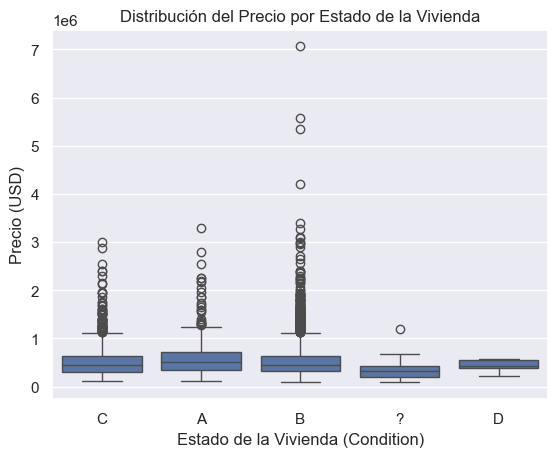

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Gr√°fico de boxplot para ver la relaci√≥n entre 'condition' y 'price'
sns.boxplot(x='condition', y='price', data=venta_viviendas_df)
plt.title('Distribuci√≥n del Precio por Estado de la Vivienda')
plt.xlabel('Estado de la Vivienda (Condition)')
plt.ylabel('Precio (USD)')
plt.show()

# Histograma para ver la distribuci√≥n de 'condition' por a√±o de construcci√≥n
sns.histplot(data=venta_viviendas_df, x='yr_built', hue='condition', multiple='stack', discrete=True)
plt.title('Distribuci√≥n de Condition por A√±o de Construcci√≥n')
plt.xlabel('A√±o de Construcci√≥n')
plt.ylabel('Frecuencia')
plt.show()


In [61]:

# Hacer una copia del DataFrame para trabajar sin modificar el original
condicion_vivienda = venta_viviendas_df.copy()

In [62]:
# Mapeo de 'condition' de letras a n√∫meros
condition_mapping = {'A': 1, 'B': 2, 'C': 3}
venta_viviendas_df['condition_numeric'] = venta_viviendas_df['condition'].map(condition_mapping)


In [63]:
# Diccionario para mapear 'condition' de letras a n√∫meros
condition_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}

# Convertir 'condition' usando el diccionario
condicion_vivienda['condition_numeric'] = condicion_vivienda['condition'].map(condition_mapping)


In [64]:
# Calcular la correlaci√≥n entre 'price' y 'condition_numeric' en la copia del DataFrame
correlation = condicion_vivienda[['price', 'condition_numeric']].corr()

# Extraer el valor de correlaci√≥n entre 'price' y 'condition_numeric'
correlation_value = correlation.loc['price', 'condition_numeric']

print("Coeficiente de correlaci√≥n entre 'Price' y 'Condition':", correlation_value)


Coeficiente de correlaci√≥n entre 'Price' y 'Condition': -0.05462331972285511


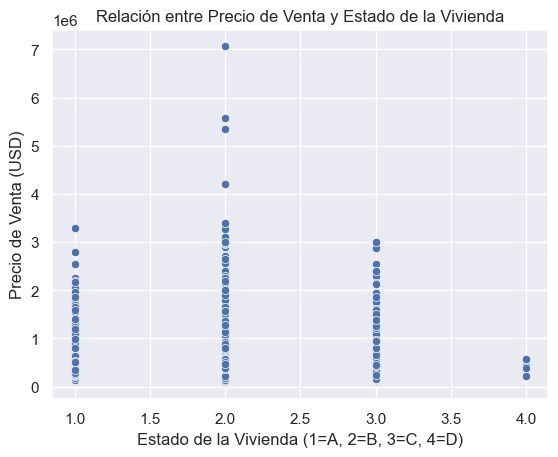

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de dispersi√≥n para visualizar la relaci√≥n entre 'price' y 'condition_numeric'
sns.scatterplot(x='condition_numeric', y='price', data=condicion_vivienda)
plt.title('Relaci√≥n entre Precio de Venta y Estado de la Vivienda')
plt.xlabel('Estado de la Vivienda (1=A, 2=B, 3=C, 4=D)')
plt.ylabel('Precio de Venta (USD)')
plt.show()



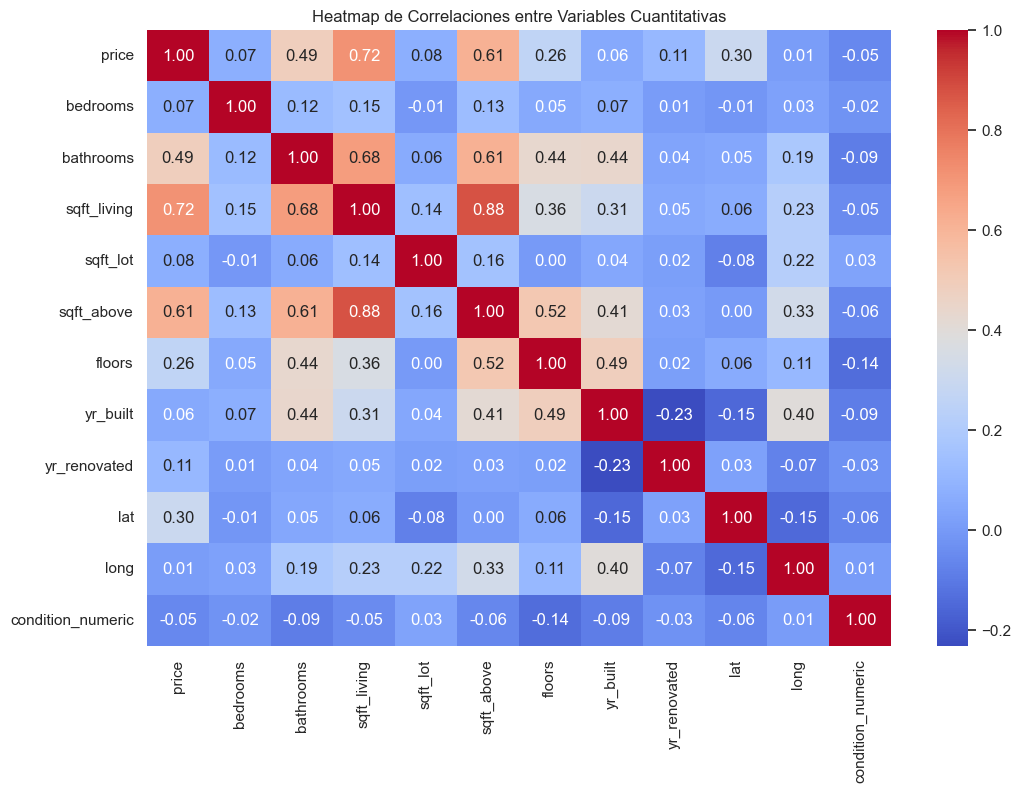

In [66]:

# Seleccionar solo columnas num√©ricas que tengan sentido para correlaci√≥n
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'yr_built', 'yr_renovated', 'lat', 'long', 'condition_numeric']

# Calcular la matriz de correlaci√≥n
correlation_matrix = condicion_vivienda[numeric_cols].corr()

# Crear el heatmap con Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlaciones entre Variables Cuantitativas')
plt.show()

 Estado de la vivienda: 
 ### Limpiamos el estado de la vivienda

- üî• **Eliminar la Columna `condition_numeric`**: Esto elimina la columna que no es necesaria para el an√°lisis.
- ‚ùå **Eliminar Filas donde `condition` es "?"**: Esto elimina filas con valores no representativos o err√≥neos.
- üîÑ **Agrupar "D" con "C"**: Al agrupar estas categor√≠as, se soluciona el problema de baja representaci√≥n de la categor√≠a "D".
- ‚úÖ **Verificar el Cambio**

In [67]:
# Eliminar la columna 'condition_numeric'
venta_viviendas_df = venta_viviendas_df.drop('condition_numeric', axis=1)


In [68]:
# Eliminar filas donde 'condition' es "?"
venta_viviendas_df = venta_viviendas_df[venta_viviendas_df['condition'] != "?"]


In [69]:
# Reemplazar 'D' con 'C' en la columna 'condition'
venta_viviendas_df['condition'] = venta_viviendas_df['condition'].replace('D', 'C')


In [70]:
# Verificar el n√∫mero de filas despu√©s de eliminar la columna y las filas
print("N√∫mero de filas despu√©s de limpieza:", venta_viviendas_df.shape[0])

# Verificar la distribuci√≥n de 'condition' despu√©s de la limpieza
print("Distribuci√≥n de 'condition':")
print(venta_viviendas_df['condition'].value_counts())


N√∫mero de filas despu√©s de limpieza: 4960
Distribuci√≥n de 'condition':
condition
B    3254
C    1294
A     412
Name: count, dtype: int64


In [71]:
# Mostrar los tipos de variables
print("Tipos de variables en el DataFrame:")
print(venta_viviendas_df.dtypes)

# Contar variables por tipo
num_vars = venta_viviendas_df.select_dtypes(include=[int, float]).columns
cat_vars = venta_viviendas_df.select_dtypes(include=[object]).columns

print("\nVariables num√©ricas:")
print(num_vars)

print("\nVariables categ√≥ricas:")
print(cat_vars)


Tipos de variables en el DataFrame:
year              int64
month             int64
price             int64
Luxury            int64
bedrooms          int64
bathrooms       float64
sqft_living       int64
sqft_lot          int64
floors          float64
waterfront        int64
view              int64
condition        object
sqft_above        int64
basement          int64
yr_built          int64
yr_renovated      int64
lat             float64
long            float64
dtype: object

Variables num√©ricas:
Index(['year', 'month', 'price', 'Luxury', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above',
       'basement', 'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')

Variables categ√≥ricas:
Index(['condition'], dtype='object')


In [72]:

import seaborn as sns
import matplotlib.pyplot as plt


# Seleccionar solo columnas num√©ricas
numeric_cols = venta_viviendas_df.select_dtypes(include=[int, float]).columns

# Calcular la matriz de correlaci√≥n
correlation_matrix = venta_viviendas_df[numeric_cols].corr()

# Mostrar correlaciones relacionadas con 'Price' y 'Luxury'
correlations_of_interest = correlation_matrix[['price', 'Luxury']]

print("Correlaciones con 'Price' y 'Luxury':")
print(correlations_of_interest)



Correlaciones con 'Price' y 'Luxury':
                 price    Luxury
year          0.021363  0.014936
month        -0.015730 -0.012330
price         1.000000  0.635134
Luxury        0.635134  1.000000
bedrooms      0.076910  0.078616
bathrooms     0.486317  0.385569
sqft_living   0.715423  0.538481
sqft_lot      0.091336  0.077028
floors        0.260883  0.244545
waterfront    0.130472  0.054102
view          0.365480  0.271661
sqft_above    0.612643  0.462169
basement      0.192060  0.178985
yr_built      0.052598  0.017559
yr_renovated  0.111653  0.079625
lat           0.301507  0.351382
long          0.009037  0.033724


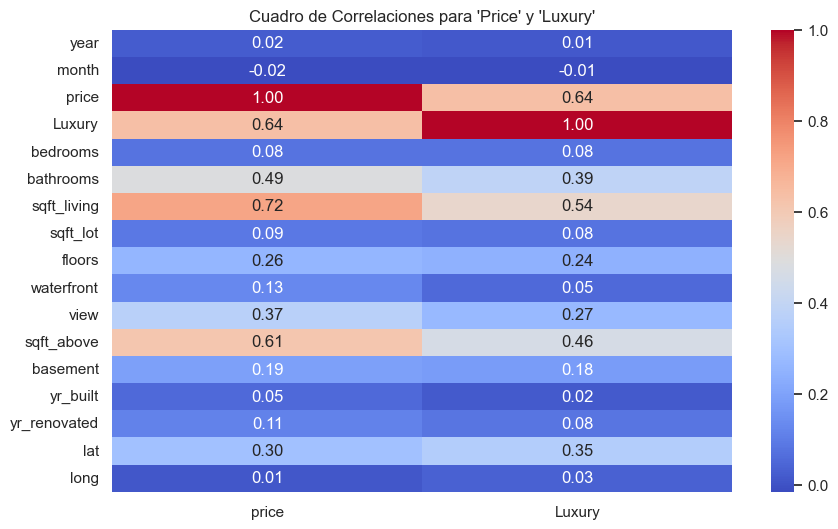

In [73]:
    # Crear el heatmap para visualizar correlaciones relacionadas con 'Price' y 'Luxury'
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlations_of_interest, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Cuadro de Correlaciones para 'Price' y 'Luxury'")
    plt.show()


### Correlaciones en VentaViviendas


  
- üîç **Variables con alta correlaci√≥n con `Price`**
  - `sqft_living` tiene una correlaci√≥n de 0.715 con el precio, sugiriendo que el tama√±o del sal√≥n es un factor importante.
  - `bathrooms` y `sqft_above` tambi√©n muestran correlaciones significativas con el precio (0.486 y 0.612, respectivamente).
  - La variable `view` tiene una correlaci√≥n de 0.365, indicando que las vistas pueden afectar el precio de venta.
  
- üîó **Variables con alta correlaci√≥n con `Luxury`**
  - `sqft_living` tiene una correlaci√≥n de 0.538 con `Luxury`, lo que sugiere que las viviendas de lujo tienden a ser m√°s grandes.
  - `bathrooms` y `lat` tienen correlaciones notables con `Luxury`, con valores de 0.385 y 0.351, respectivamente.
  
- ‚ùå **Variables con baja correlaci√≥n**
  - Algunas variables, como `month`, `year`(a√±o de venta), y `yr_built` (a√±o de construccion), tienen correlaciones bajas con `Price` y `Luxury`. Esto sugiere que pueden no ser factores significativos para el an√°lisis.

- üìã **Recomendaciones**
  -  colinealidad entre variables como `sqft_living` y `sqft_above`.
  -  eliminar o dar menos importancia a las variables con correlaci√≥n baja, como `month`, `year`, y `yr_built`.
  - Explorar m√°s a fondo las variables con alta correlaci√≥n utilizando gr√°ficos de dispersi√≥n, boxplots, y an√°lisis estad√≠sticos para obtener informaci√≥n detallada.


In [74]:
# Mostrar las primeras 5 filas del DataFrame
primeras_filas_df = venta_viviendas_df.head()

print("Primeras 5 filas del DataFrame:")
print(primeras_filas_df)


Primeras 5 filas del DataFrame:
   year  month   price  Luxury  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014      7  653450       1         3        2.5         2070        -1   
1  2014      6  710000       1         2        1.5         1640        -1   
2  2014     10  780000       1         4        3.5         3720        -1   
3  2014     12  795000       1         3        3.5         2260        -1   
4  2014     10  399950       0         3        2.0         2050        -1   

   floors  waterfront  view condition  sqft_above  basement  yr_built  \
0     1.0           0     0         C        1540         1      1980   
1     1.5           0     0         A        1540         1      1916   
2     1.0           0     1         B        3720         0      2007   
3     2.0           0     0         B        1880         1      2003   
4     1.0           0     0         A        1170         1      1960   

   yr_renovated      lat     long  
0             0  47.5936

In [75]:
# Ver todas las columnas en el DataFrame
print("Columnas en el DataFrame:")
print(venta_viviendas_df.columns)

# Verificar si 'log_price' est√° en las columnas
if 'log_price' in venta_viviendas_df.columns:
    print("La columna 'log_price' est√° en el DataFrame.")
else:
    print("La columna 'log_price' no est√° en el DataFrame.")


Columnas en el DataFrame:
Index(['year', 'month', 'price', 'Luxury', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'basement', 'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')
La columna 'log_price' no est√° en el DataFrame.


In [76]:
# Copiar el DataFrame 'venta_viviendas_df'
df1 = venta_viviendas_df.copy()

In [77]:
# Eliminar la columna 'year' del DataFrame
df1.drop('year', axis=1, inplace=True)


In [78]:
# Eliminar la columna 'year' del DataFrame
df1.drop('month', axis=1, inplace=True)

In [79]:
# Estad√≠sticas descriptivas despu√©s de la winsorizaci√≥n
print("\nEstad√≠sticas descriptivas del DataFrame con winsorizaci√≥n:")
print(df1.describe())


Estad√≠sticas descriptivas del DataFrame con winsorizaci√≥n:
              price       Luxury     bedrooms    bathrooms   sqft_living  \
count  4.960000e+03  4960.000000  4960.000000  4960.000000   4960.000000   
mean   5.457200e+05     0.425000     3.621573     2.144960   2083.497984   
std    3.736272e+05     0.494393     3.661485     0.866843    916.004707   
min    8.650000e+04     0.000000     0.000000     0.000000    370.000000   
25%    3.250000e+05     0.000000     3.000000     1.500000   1410.000000   
50%    4.532500e+05     0.000000     3.000000     2.500000   1920.000000   
75%    6.491250e+05     1.000000     4.000000     2.500000   2560.000000   
max    7.062500e+06     1.000000    70.000000     6.000000  10040.000000   

            sqft_lot       floors   waterfront        view   sqft_above  \
count    4960.000000  4960.000000  4960.000000  4960.00000  4960.000000   
mean    13437.691331     1.499798    -0.012702     0.09879  1789.927823   
std     33762.814063     0.5

### Missing

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar datos faltantes como un heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title("Distribuci√≥n de Datos Faltantes")
plt.show()


### Outliers
Usaremos  histogramas te permiten ver la distribuci√≥n de una variable, mientras que los boxplots son √∫tiles para identificar valores extremos y observar la variabilidad de la distribuci√≥n.

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear histogramas para todas las variables num√©ricas
df1.hist(bins=30, figsize=(15, 10), color='skyblue', alpha=0.7)
plt.suptitle("Histogramas de Variables Num√©ricas")
plt.show()


#### Hacemos un analisis mas profundo de las variables mas relacionadas 

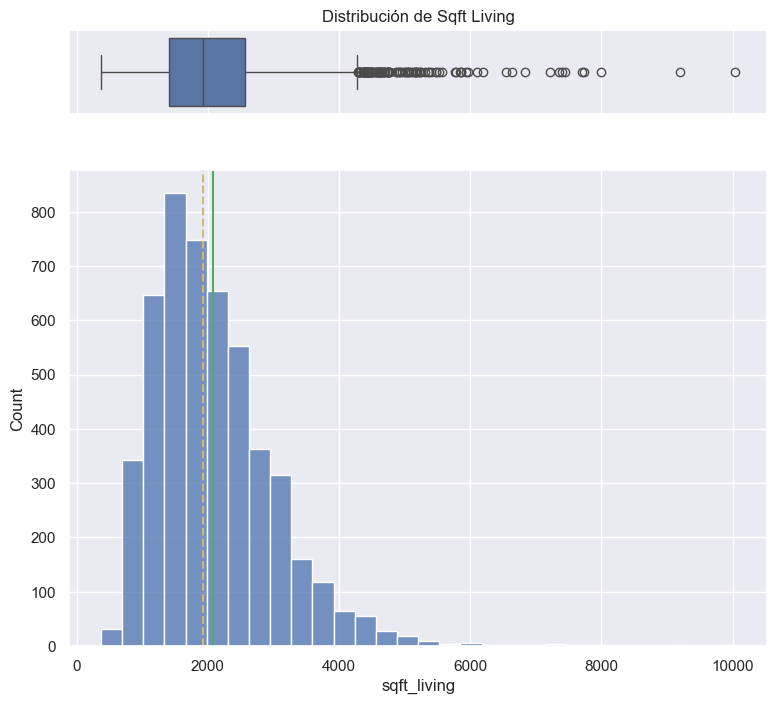

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definici√≥n de la funci√≥n 'histogram_boxplot'
def histogram_boxplot(data, xlabel=None, title=None, font_scale=1, figsize=(9, 8), bins=None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel
    title: title
    font_scale: the scale of the font (default 1)
    figsize: size of fig (default (9, 8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(x=data, ax=ax_box2)
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    ax_hist2.axvline(np.mean(data), color='g', linestyle='-')
    ax_hist2.axvline(np.median(data), color='y', linestyle='--')
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    plt.show()

# Usar la funci√≥n para crear un boxplot y histograma para 'sqft_living'
histogram_boxplot(df1['sqft_living'], bins=30, font_scale=1, title="Distribuci√≥n de Sqft Living")


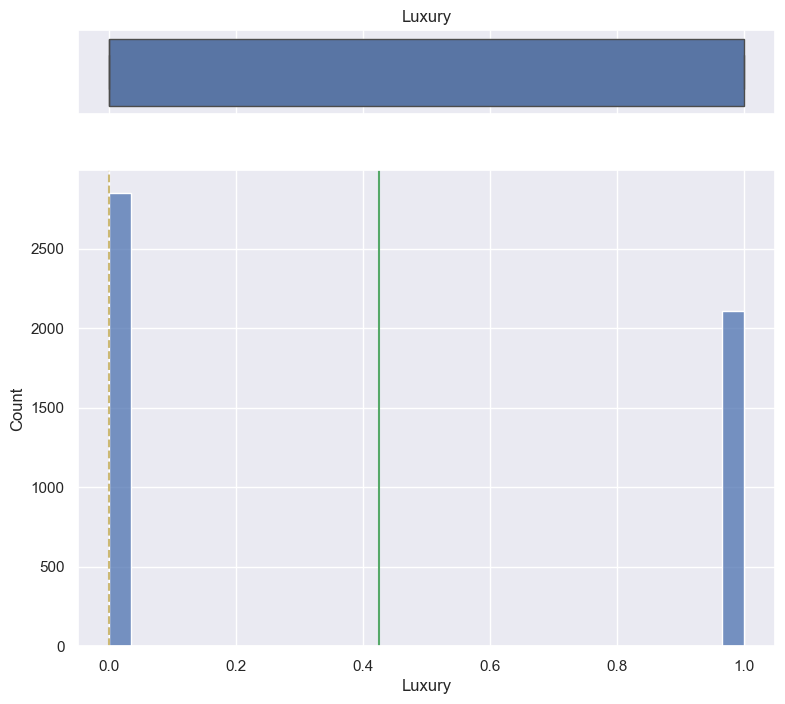

In [83]:
histogram_boxplot(df1['Luxury'], bins=30, font_scale=1, title="Luxury")
#1 si se trata de una vivienda de lujo (precio superior a medio mill√≥n de $) y 0, NO

In [84]:
histogram_boxplot(df1['price'], bins=30, font_scale=1, title="precio")

In [85]:
histogram_boxplot(df1['sqft_living'], bins=30, font_scale=1, title="sqft_living")

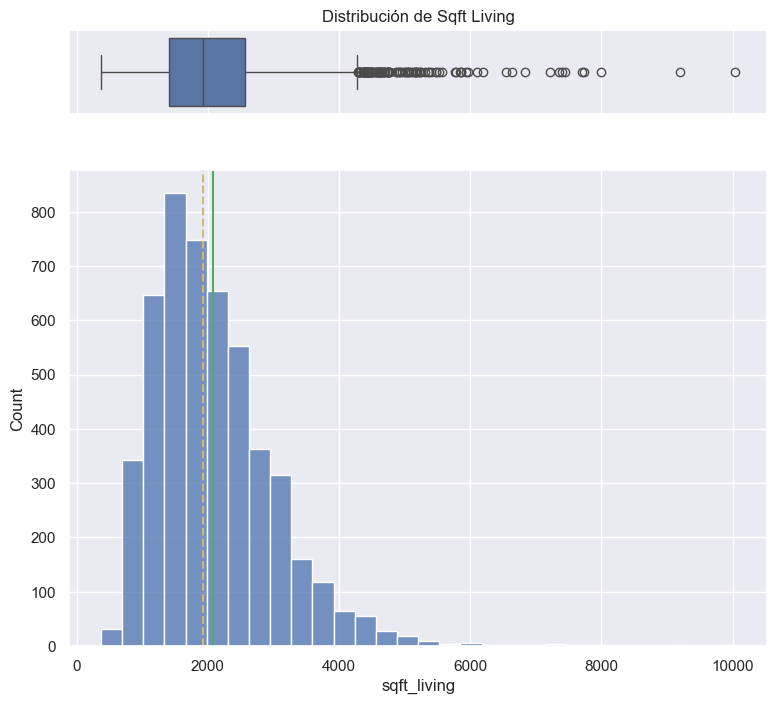

In [86]:
histogram_boxplot(venta_viviendas_df['sqft_living'], bins=30, font_scale=1, title="Distribuci√≥n de Sqft Living")


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear boxplot para 'Price' para identificar outliers
sns.boxplot(x=venta_viviendas_df['price'])
plt.title("Boxplot para 'Price'")
plt.show()


#### Analisis de asimetria

In [103]:
# Ahora puedes usar np.number en select_dtypes
df1.select_dtypes(include=np.number).apply(lambda x: x.skew())

price            4.278559
Luxury           0.303525
bedrooms        13.112378
bathrooms        0.030635
sqft_living      1.408811
sqft_lot        10.102275
floors           0.608191
waterfront      -2.288269
view             2.690064
sqft_above       1.413926
basement         0.443723
yr_built        -0.472136
yr_renovated     4.486804
lat             -0.511377
long             0.792709
dtype: float64

In [89]:
def calculate_outlier_percentage(col):
    """
    Calcula el porcentaje de outliers en una columna.
    """
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    IQR = q3 - q1

    # Calcular los l√≠mites para identificar outliers
    lower_limit = q1 - 3 * IQR
    upper_limit = q3 + 3 * IQR

    # Contar el n√∫mero de outliers
    num_outliers = ((col < lower_limit) | (col > upper_limit)).sum()

    # Calcular el porcentaje de outliers
    percentage_outliers = (num_outliers / len(col)) * 100

    return percentage_outliers

# Calcular el porcentaje de outliers para cada columna num√©rica en original_df
outlier_percentages = df1.select_dtypes(include=np.number).apply(calculate_outlier_percentage)

# Mostrar los porcentajes de outliers para cada columna
print("Porcentaje de outliers fuera de los cuartiles:")
print(outlier_percentages)

Porcentaje de outliers fuera de los cuartiles:
price           1.895161
Luxury          0.000000
bedrooms        0.685484
bathrooms       0.080645
sqft_living     0.282258
sqft_lot        7.318548
floors          0.000000
waterfront      2.963710
view            9.879032
sqft_above      0.241935
basement        0.000000
yr_built        0.000000
yr_renovated    4.334677
lat             0.000000
long            0.040323
dtype: float64


vemos un porcentaje bajo de outliers fuera de los cuartiles por lo que aplicaremos winzorizacion para suavizar el impacto de los outliers sin eliminarlos por completo.

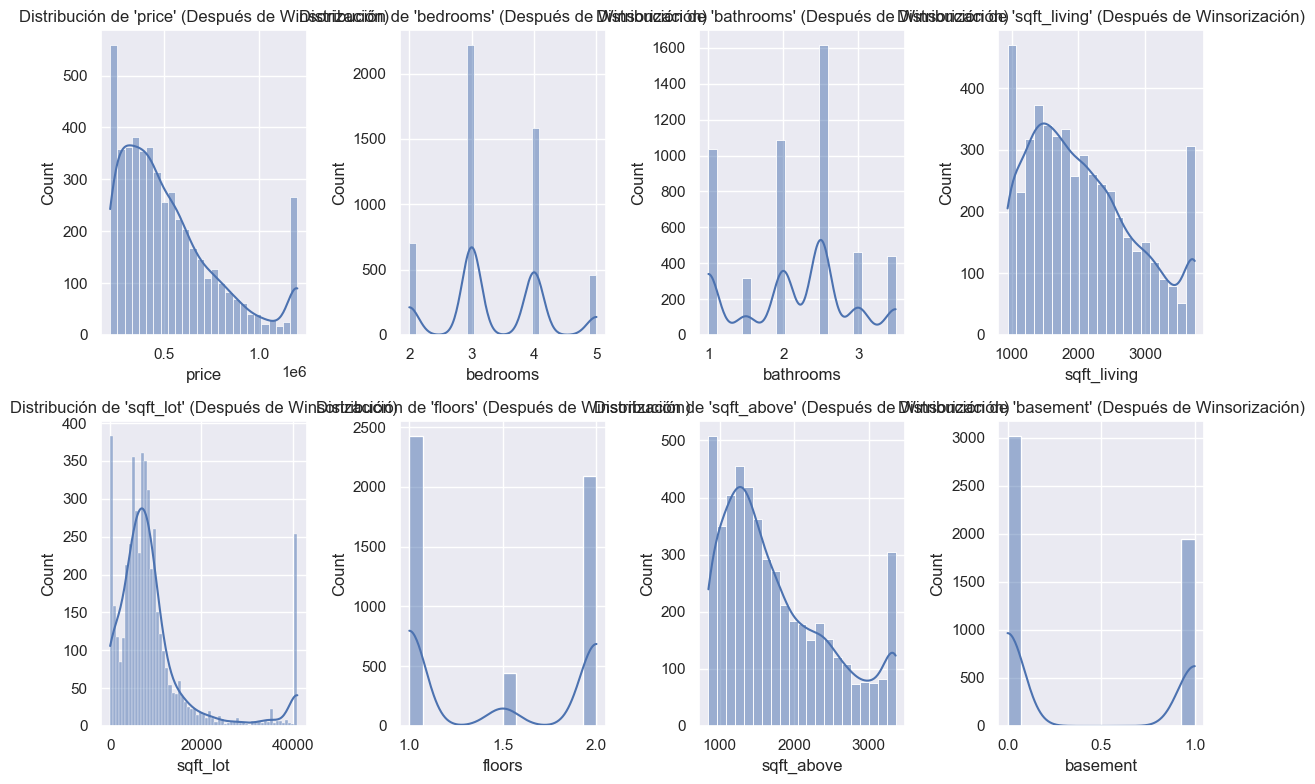

In [90]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las columnas a las que se aplicar√° la winsorizaci√≥n
columns_to_winsorize = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'basement']

# Crear una copia del DataFrame para aplicar winsorizaci√≥n
dfwinsorized = venta_viviendas_df.copy()

# Aplicar winsorizaci√≥n a las columnas seleccionadas
# Usar el 5% y el 95% como l√≠mites
for col in columns_to_winsorize:
    dfwinsorized[col] = winsorize(dfwinsorized[col], limits=[0.05, 0.05])

# Verificar la distribuci√≥n despu√©s de la winsorizaci√≥n
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_winsorize, start=1):
    plt.subplot(2, 4, i)  # Ajustar el n√∫mero de subgr√°ficos y el dise√±o
    sns.histplot(dfwinsorized[col], kde=True)
    plt.title(f"Distribuci√≥n de '{col}' (Despu√©s de Winsorizaci√≥n)")
plt.tight_layout()  # Ajustar el espaciado entre subgr√°ficos
plt.show()


In [91]:
#cargamos el df tratado, que luego utilizaremos
df_depurado_viviendas = dfwinsorized

# Mostramos las primeras filas del nuevo DataFrame para verificar
print(df_depurado_viviendas.head())

   year  month   price  Luxury  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014      7  653450       1         3        2.5         2070        -1   
1  2014      6  710000       1         2        1.5         1640        -1   
2  2014     10  780000       1         4        3.5         3720        -1   
3  2014     12  795000       1         3        3.5         2260        -1   
4  2014     10  399950       0         3        2.0         2050        -1   

   floors  waterfront  view condition  sqft_above  basement  yr_built  \
0     1.0           0     0         C        1540         1      1980   
1     1.5           0     0         A        1540         1      1916   
2     1.0           0     1         B        3360         0      2007   
3     2.0           0     0         B        1880         1      2003   
4     1.0           0     0         A        1170         1      1960   

   yr_renovated      lat     long  
0             0  47.5936 -122.013  
1             0  47.

In [104]:
df_depurado_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4960 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          4960 non-null   int64  
 1   month         4960 non-null   int64  
 2   price         4960 non-null   int64  
 3   Luxury        4960 non-null   int64  
 4   bedrooms      4960 non-null   int64  
 5   bathrooms     4960 non-null   float64
 6   sqft_living   4960 non-null   int64  
 7   sqft_lot      4960 non-null   int64  
 8   floors        4960 non-null   float64
 9   waterfront    4960 non-null   int64  
 10  view          4960 non-null   int64  
 11  condition     4960 non-null   object 
 12  sqft_above    4960 non-null   int64  
 13  basement      4960 non-null   int64  
 14  yr_built      4960 non-null   int64  
 15  yr_renovated  4960 non-null   int64  
 16  lat           4960 non-null   float64
 17  long          4960 non-null   float64
dtypes: float64(4), int64(13), object(

In [105]:
# Guardamos el nuevo DataFrame en un archivo CSV
df_depurado_viviendas.to_csv('df_depurado_viviendas.csv', index=False)


-----##------- Explorando relaciones

### Analisis de relaciones

El an√°lisis de las relaciones entre las variables input y objetivo a trav√©s de estad√≠sticos (como
la correlaci√≥n o la V de Cramer) o de gr√°ficos es altamente recomendable de cara a detectar
variables que realmente no aportan nada a la variable objetivo y que puedan, por tanto,
*rechazarse en la fase de modelizaci√≥n.*

Tendremos la variable objetivo 'price', primero veremos una matriz de correlacion 

Correlaciones con 'Price':
                 price
year          0.016431
month        -0.017728
price         1.000000
Luxury        0.792815
bedrooms      0.362886
bathrooms     0.511363
sqft_living   0.699288
sqft_lot      0.154042
floors        0.317929
waterfront    0.097442
view          0.379691
sqft_above    0.592806
basement      0.209219
yr_built      0.055248
yr_renovated  0.110599
lat           0.382784
long          0.023665


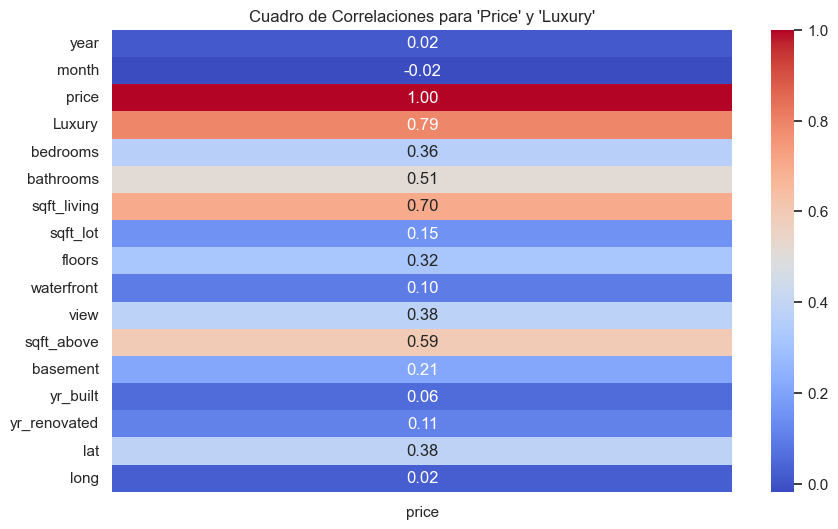

In [94]:

# Seleccionar solo columnas num√©ricas
numeric_cols = dfwinsorized.select_dtypes(include=[int, float]).columns

# Calcular la matriz de correlaci√≥n
correlation_matrix = dfwinsorized[numeric_cols].corr()

# Mostrar correlaciones relacionadas con 'Price' y 'Luxury'
correlations_of_interest = correlation_matrix[['price']]

print("Correlaciones con 'Price':")
print(correlations_of_interest)

# Crear el heatmap para visualizar correlaciones relacionadas con 'Price' y 'Luxury'
plt.figure(figsize=(10, 6))
sns.heatmap(correlations_of_interest, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cuadro de Correlaciones para 'Price' y 'Luxury'")
plt.show()


Para confirmar las variables mas influeyentes (intuimos las mas influentes: sqft_above, sqft_ living
bathrooms), mediremos la  V de Cramer, una medida de asociaci√≥n entre dos variables categ√≥ricas. Medir la intensidad de asociaci√≥n entre variables ayuda a identificar las m√°s relevantes para el modelo predictivo. 

### Ranking de efectos previos por V de cramer
Queremos evaluar la relaci√≥n de cada variable del conjunto de datos con la variable objetivo  (puede ser continua como el precio de una casa, o binaria como si una casa se vendi√≥ o no). La idea es obtener una medida que nos permita ordenar estas variables seg√∫n la fuerza de su asociaci√≥n con la variable objetivo.

¬øQu√© es el V de Cramer?
El V de Cramer es una medida estad√≠stica que nos indica cu√°n fuertemente dos variables categ√≥ricas est√°n asociadas. Su valor var√≠a entre 0 (sin asociaci√≥n) y 1 (asociaci√≥n perfecta).

#### Caracter√≠sticas de la V de Cramer

1. **Rango**: La V de Cramer var√≠a entre 0 y 1.
   - **0** indica que no hay asociaci√≥n entre las variables.
   - **1** indica una asociaci√≥n perfecta entre las variables.

2. **Simetr√≠a**: La V de Cramer es sim√©trica, lo que significa que el valor es el mismo independientemente del orden de las variables (i.e., `V(x, y) = V(y, x)`).

3. **Aplicabilidad**: Se puede usar con tablas de contingencia de cualquier tama√±o (no necesariamente cuadradas).


In [95]:
df_regresion = dfwinsorized.copy()

#### Funci√≥n para calcular V de Cramer entre dos variables

In [96]:
# Funci√≥n para calcular V de Cramer entre dos variables
def cramers_v(var1, varObj):
    # Asegurarse de que las variables sean num√©ricas antes de discretizar
    if pd.api.types.is_numeric_dtype(var1):
        var1 = pd.cut(var1, bins=5)
    
    if pd.api.types.is_numeric_dtype(varObj):
        varObj = pd.cut(varObj, bins=5)
    
    # Crear tabla de contingencia y calcular V de Cramer
    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method='cramer')
    return vCramer


In [97]:
from scipy import stats
import plotly.express as px

In [98]:
# Variables num√©ricas para evaluar
numeric_vars = ['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'basement']

# Variable objetivo ( 'price')
varObjCont = df_regresion['price']

# Aplicar la funci√≥n a las columnas num√©ricas contra la variable objetivo
tablaCramer = pd.DataFrame(df_regresion[numeric_vars].apply(lambda x: cramers_v(x, varObjCont)), columns=['VCramer'])

# Mostrar el resultado del V de Cramer
print("Tabla de V de Cramer:")
print(tablaCramer)


Tabla de V de Cramer:
              VCramer
bathrooms    0.291275
sqft_living  0.373411
sqft_lot     0.106729
floors       0.222120
waterfront   0.131885
view         0.387976
sqft_above   0.292659
basement     0.212511


In [99]:
# gr√°fico de barras para visualizar la importancia de cada variable frente a la objetivo
fig = px.bar(tablaCramer, x='VCramer', y=tablaCramer.index, title='Relaciones frente a "Price" seg√∫n V de Cramer')
fig.update_yaxes(categoryorder='total ascending')  # Ordenar de forma ascendente
fig.show()  # Mostrar el gr√°fico


Los valores de V de Cramer nos dicen que las variables sqft_living y view son las que tienen una relaci√≥n m√°s fuerte con el precio de las casas.